In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dataset=pd.read_csv('train_TimeSeries.csv')
test=pd.read_csv('test_TimeSeries.csv')

In [56]:
del test['id']

In [57]:
test

,date,store,item
0,2018-01-01,1,1
1,2018-01-02,1,1
2,2018-01-03,1,1
3,2018-01-04,1,1
4,2018-01-05,1,1
...,...,...,...
44995,2018-03-27,10,50
44996,2018-03-28,10,50
44997,2018-03-29,10,50
44998,2018-03-30,10,50


In [58]:
dataset

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [159]:
def date_features(df):
    # Date Features
    df['date'] = pd.to_datetime(dataset['date'])
    df['year'] = dataset.date.dt.year
    df['month'] = dataset.date.dt.month
    df['day'] = dataset.date.dt.day
    df['dayofyear'] = dataset.date.dt.dayofyear
    df['dayofweek'] = dataset.date.dt.dayofweek
    df['weekofyear'] = dataset.date.dt.weekofyear
    
    # Additionnal Data Features
    df['day^year'] = np.log((np.log(dataset['dayofyear'] + 1)) ** (dataset['year'] - 2000))
    
    # Drop date
    df.drop('date', axis=1, inplace=True)
    
    return df

In [160]:
train = date_features(dataset)

C:\Users\Nabeel\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [65]:
# test = date_features(test)

In [61]:
train

,store,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,day^year
0,1,1,13,2013,1,1,1,1,1,-4.764668
1,1,1,11,2013,1,2,2,2,1,1.222622
2,1,1,14,2013,1,3,3,3,1,4.246245
3,1,1,13,2013,1,4,4,4,1,6.186505
4,1,1,10,2013,1,5,5,5,1,7.581575
...,...,...,...,...,...,...,...,...,...,...
912995,10,50,63,2017,12,27,361,2,52,30.150097
912996,10,50,59,2017,12,28,362,3,52,30.158055
912997,10,50,74,2017,12,29,363,4,52,30.165987
912998,10,50,62,2017,12,30,364,5,52,30.173894


In [161]:
# Daily Average, Monthly Average for train
train['daily_avg']  = train.groupby(['item','store','dayofweek'])['sales'].transform('mean')
train['monthly_avg'] = train.groupby(['item','store','month'])['sales'].transform('mean')
train['yearly_avg'] = train.groupby(['item','store','year'])['sales'].transform('mean')
train = train.dropna()

# Average sales for Day_of_week = d per Item,Store
daymonth_avg = train.groupby(['item','store','dayofweek'])['sales'].mean().reset_index()
# Average sales for Month = m per Item,Store
monthly_avg = train.groupby(['item','store','month'])['sales'].mean().reset_index()

In [62]:
# # Merge Test with Daily Avg, Monthly Avg
# def merge(df1, df2, col,col_name):
    
#     df1 =pd.merge(df1, df2, how='left', on=None, left_on=col, right_on=col,
#             left_index=False, right_index=False, sort=True,
#              copy=True, indicator=False)
    
#     df1 = df1.rename(columns={'sales':col_name})
#     return df1

# # Add Daily_avg and Monthly_avg features to test 
# test = merge(test, daily_avg,['item','store','dayofweek'],'daily_avg')
# test = merge(test, monthly_avg,['item','store','month'],'monthly_avg')

# # Sales Rolling mean sequence per item 
# rolling_10 = train.groupby(['item'])['sales'].rolling(10).mean().reset_index().drop('level_1', axis=1)
# train['rolling_mean'] = rolling_10['sales'] 

# # 90 last days of training rolling mean sequence added to test data
# rolling_last90 = train.groupby(['item','store'])['rolling_mean'].tail(90).copy()
# test['rolling_mean'] = rolling_last90.reset_index().drop('index', axis=1)

# # Shifting rolling mean 3 months
# train['rolling_mean'] = train.groupby(['item'])['rolling_mean'].shift(90) # Create a feature with rolling mean of day - 90
# train.head()

In [162]:
train

,store,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,day^year,daily_avg,monthly_avg,yearly_avg
0,1,1,13,2013,1,1,1,1,1,-4.764668,18.168582,13.709677,16.506849
1,1,1,11,2013,1,2,2,2,1,1.222622,18.793103,13.709677,16.506849
2,1,1,14,2013,1,3,3,3,1,4.246245,19.452107,13.709677,16.506849
3,1,1,13,2013,1,4,4,4,1,6.186505,21.015326,13.709677,16.506849
4,1,1,10,2013,1,5,5,5,1,7.581575,22.973180,13.709677,16.506849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,10,50,63,2017,12,27,361,2,52,30.150097,68.823755,56.283871,82.904110
912996,10,50,59,2017,12,28,362,3,52,30.158055,73.532567,56.283871,82.904110
912997,10,50,74,2017,12,29,363,4,52,30.165987,78.275862,56.283871,82.904110
912998,10,50,62,2017,12,30,364,5,52,30.173894,82.854406,56.283871,82.904110


# Other Way

In [7]:
Train_data=pd.read_csv('train_TimeSeries.csv',parse_dates=True,index_col=0,squeeze=True)
# test=pd.read_csv('test_TimeSeries.csv')


# Performing EDA

In [3]:
Train_data.dtypes

store    int64
item     int64
sales    int64
dtype: object

In [168]:
# checking null value

In [4]:
Train_data.isna().sum()
#  no any null value are present

store    0
item     0
sales    0
dtype: int64

In [127]:
Train_data.shape

(913000, 3)

In [122]:
Train_data[Train_data.duplicated()].sum()


store     4799513
item     22263481
sales    44999817
dtype: int64

In [132]:
Train_data[Train_data.duplicated()]
#  duplivation are available but we are not removing this because its about sale and its commont in sales

,store,item,sales
date,,,
2013-01-04,1,1,13
2013-01-07,1,1,10
2013-01-09,1,1,12
2013-01-10,1,1,9
2013-01-11,1,1,9
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


In [170]:
Train_data

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


# Basic Future Enginering

In [5]:
Train_data['Year']=Train_data.index.year
Train_data['Month']=Train_data.index.month
Train_data['Day']=Train_data.index.day
Train_data['DayName']=Train_data.index.day_name()

In [6]:
Train_data

,store,item,sales,Year,Month,Day,DayName
date,,,,,,,
2013-01-01,1,1,13,2013,1,1,Tuesday
2013-01-02,1,1,11,2013,1,2,Wednesday
2013-01-03,1,1,14,2013,1,3,Thursday
2013-01-04,1,1,13,2013,1,4,Friday
2013-01-05,1,1,10,2013,1,5,Saturday
...,...,...,...,...,...,...,...
2017-12-27,10,50,63,2017,12,27,Wednesday
2017-12-28,10,50,59,2017,12,28,Thursday
2017-12-29,10,50,74,2017,12,29,Friday


# Visualizing Time Series 

In [3]:
import seaborn as sns

<AxesSubplot:xlabel='date'>

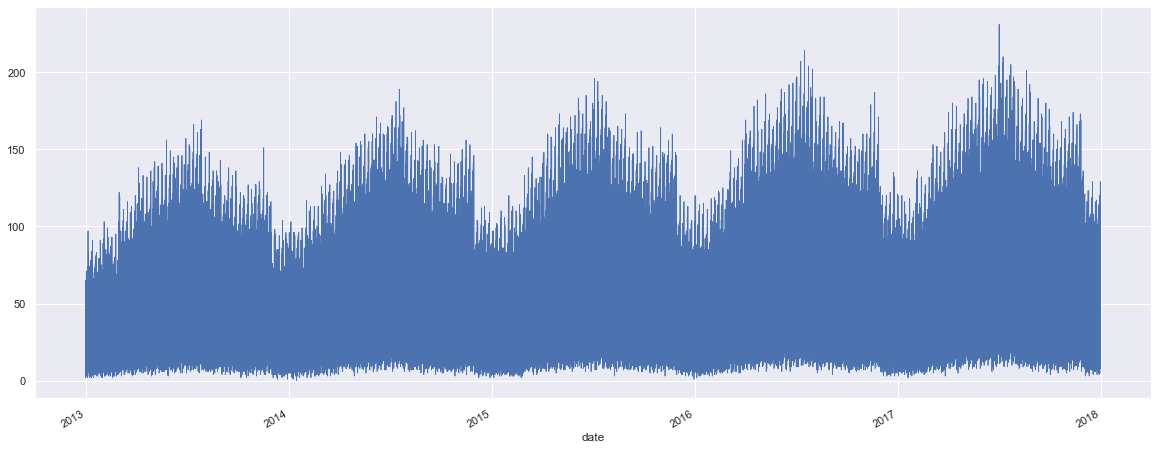

In [181]:
sns.set(rc={'figure.figsize':(20,8)})
Train_data['sales'].plot(linewidth=0.8)

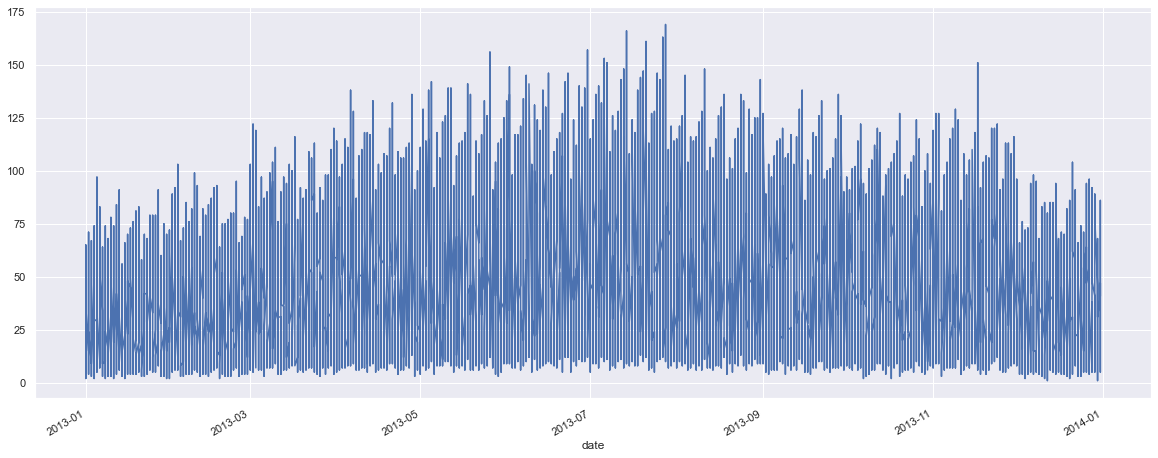

In [190]:
ax = Train_data.loc['2013', 'sales'].plot()

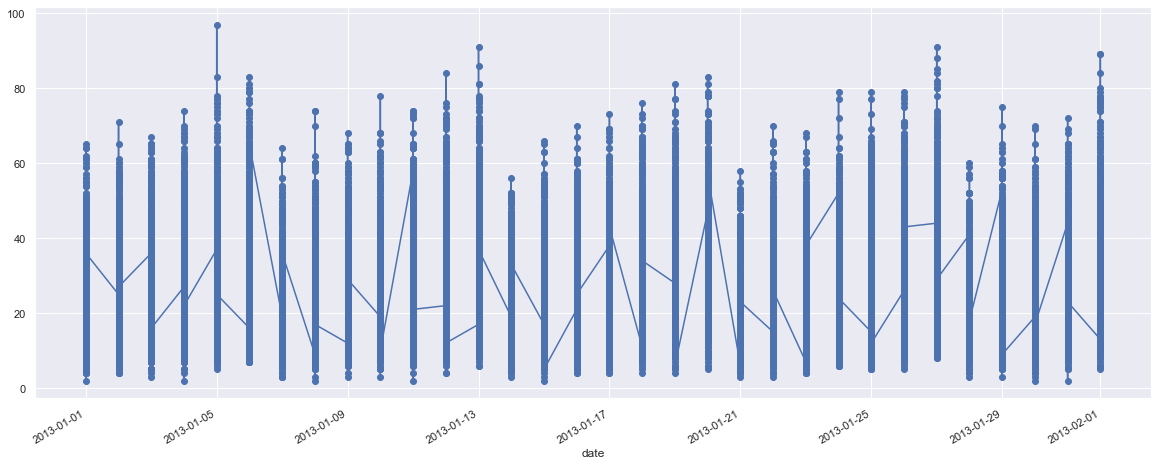

In [196]:
# one month sale
ax = Train_data.loc['2013-01-01':'2013-02-01', 'sales'].plot(marker='o', linestyle='-')

<AxesSubplot:xlabel='date'>

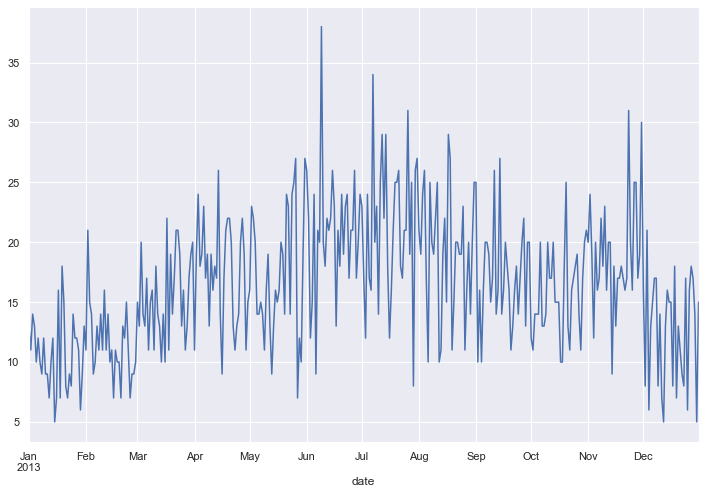

In [204]:
# 1 year 1 store 1 item sales
one_year=Train_data.loc['2013']
one_year=one_year[(one_year['store']==1)&(one_year['item']==1)]['sales']
one_year.plot(figsize=(12,8))

<AxesSubplot:xlabel='date'>

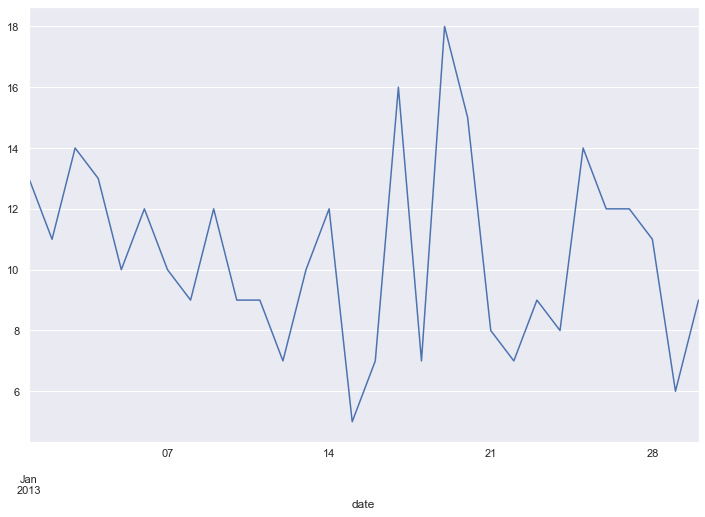

In [208]:
one_month=Train_data.loc["2013-01-01":"2013-01-30"]
one_month=one_month[(one_month['store']==1)&(one_month['item']==1)]['sales']
one_month.plot(figsize=(12,8))

In [87]:
# item 1 in all shops all year
Train_data[Train_data['item']==1]

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,1,19
2017-12-28,10,1,12
2017-12-29,10,1,23


In [205]:
#  in one shop all itemss
st=Train_data[Train_data['store']==1]['sales']

In [206]:
st

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
              ..
2017-12-27    38
2017-12-28    52
2017-12-29    59
2017-12-30    66
2017-12-31    45
Name: sales, Length: 91300, dtype: int64

<AxesSubplot:xlabel='date'>

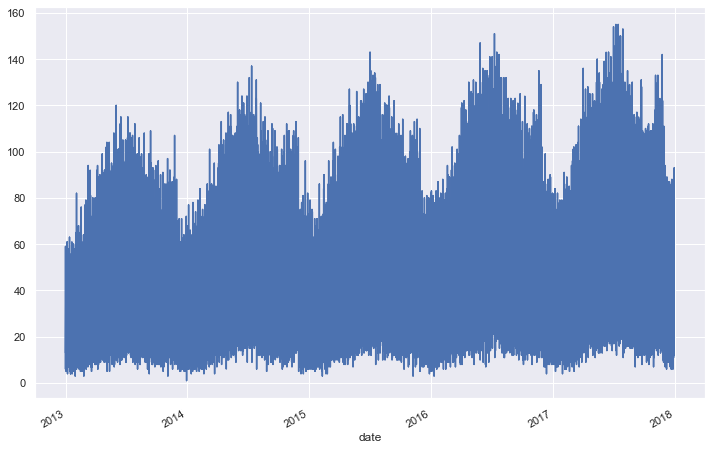

In [207]:
st.plot(figsize=(12,8))

In [140]:
#  checking stationaryity (sales) of store 1 and item 1
dt=Train_data[(Train_data['store']==1)&(Train_data['item']==1)]['sales']

In [146]:
dt

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
              ..
2017-12-27    14
2017-12-28    19
2017-12-29    15
2017-12-30    27
2017-12-31    23
Name: sales, Length: 1826, dtype: int64

<AxesSubplot:xlabel='date'>

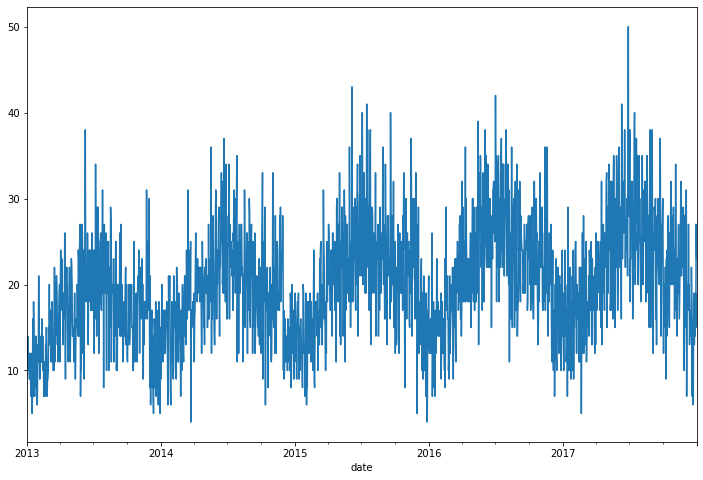

In [143]:
dt.plot(figsize=(12,8))
#  trand and stationarity are present in yearly level

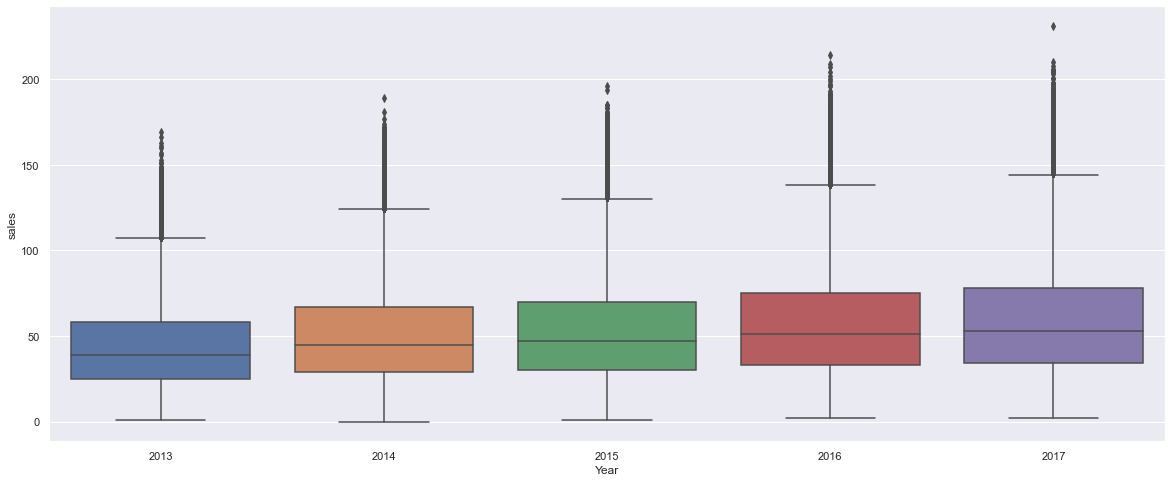

In [211]:
sns.boxplot(data=Train_data, x='Year', y='sales');

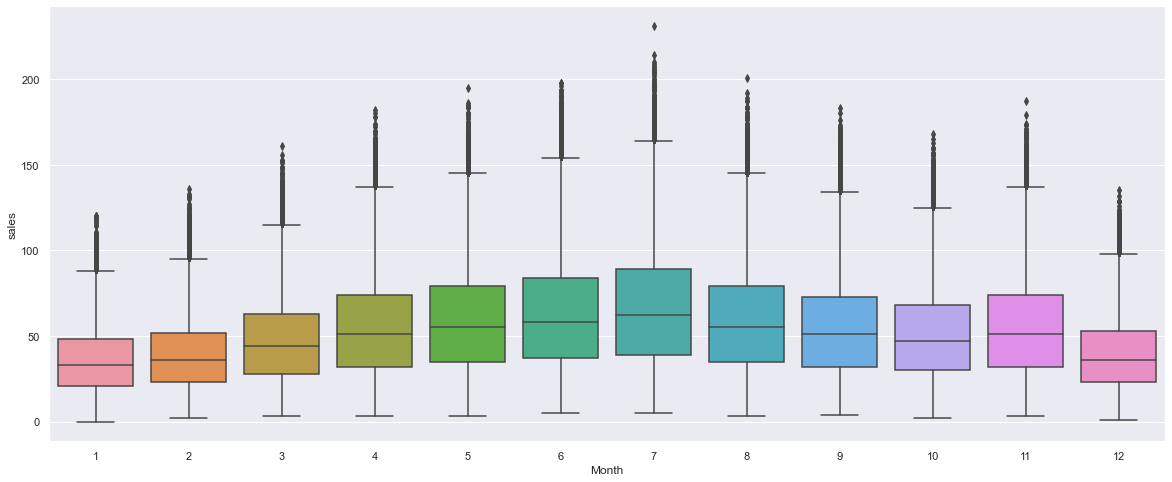

In [212]:
sns.boxplot(data=Train_data, x='Month', y='sales');

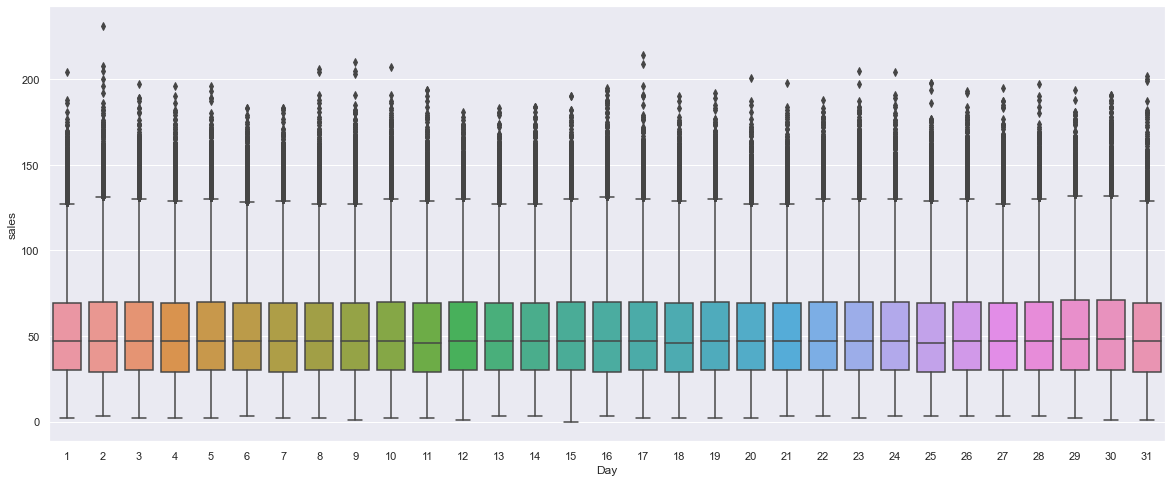

In [217]:
sns.boxplot(data=Train_data, x='Day', y='sales');

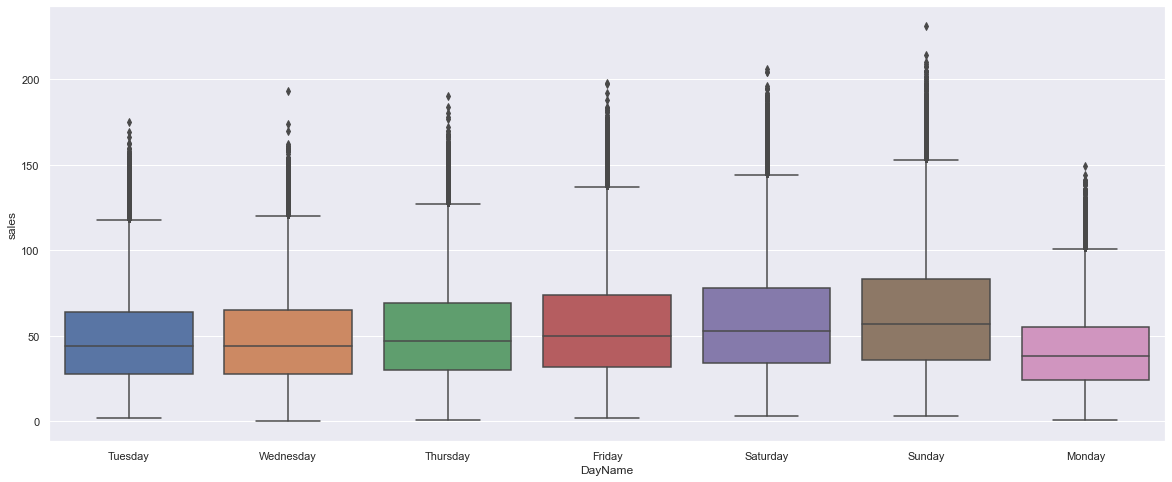

In [218]:
sns.boxplot(data=Train_data, x='DayName', y='sales');

Hypothesis testing
* H0= Time series is non-Stationary
* H1=Time Series is Stationary

# Checking Stationarity and Trands

1. By ploting map
2. By summary statestic (Mean/STD)
3. By Statestical Test (ADF)

#  By Summary statestic

In [8]:
Sales_Data=Train_data['sales']

(array([1.41304e+05, 3.09995e+05, 2.32808e+05, 1.36482e+05, 6.28770e+04,
        2.25590e+04, 5.86500e+03, 1.00900e+03, 9.60000e+01, 5.00000e+00]),
 array([  0. ,  23.1,  46.2,  69.3,  92.4, 115.5, 138.6, 161.7, 184.8,
        207.9, 231. ]),
 <a list of 10 Patch objects>)

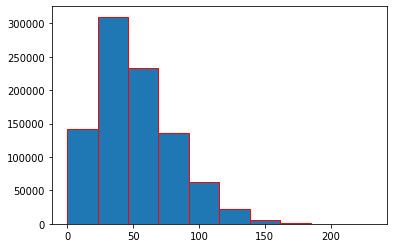

In [15]:
# plt.figure(figsize=(8,12))
plt.hist(Sales_Data,edgecolor='red')

# <h3>Checking mean between 2 years<h3/>

In [16]:
fist_2_years=Sales_Data.loc['2013-01-01':'2015-01-01']

X=fist_2_years.values
split=int(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1, mean2=X1.mean(),X2.mean()
var1, var2= X1.var(),X2.var()
print('mean1=%f,mean2=%f'%(mean1,mean2))
print('var1=%f,var2=%f'%(var1,var2))

mean1=49.195611,mean2=44.341740
var1=698.164406,var2=600.308138


In [17]:
Lat_2_years=Sales_Data.loc['2015-01-01':'2017-01-01']

X=Lat_2_years.values
split=int(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1, mean2=X1.mean(),X2.mean()
var1, var2= X1.var(),X2.var()
print('mean1=%f,mean2=%f'%(mean1,mean2))
print('var1=%f,var2=%f'%(var1,var2))

mean1=57.257574,mean2=51.582623
var1=921.584366,var2=790.157261


In [19]:
one_year_data =Sales_Data.loc['2013-01-01':'2013-12-31']
X=one_year_data.values
Split_Data=int(len(X)//2)
X1 =X[:Split_Data]
X2 = X[Split_Data:]
Mean1,Mean2=X1.mean(),X2.mean()
var1, var2= X1.var(),X2.var()
print('mean1=%f,mean2=%f'%(Mean1,Mean2))
print('var1=%f,var2=%f'%(var1,var2))

mean1=45.794959,mean2=41.232362
var1=593.659460,var2=512.257427


Now between 2 year or in 1 year mean and variance are change thats mean data is non-stationary 

# <h2>By Summery statestic (ADT) Test<h2/>

In [12]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# two year data
two_year_data=Sales_Data[:'2013-12-31'].values
X=two_year_data
result=adfuller(X)
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print(' Citical Values:')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key, value))